In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
from graphviz import Graph

In [5]:
# w.get_zillow_data()

In [6]:
df = w.get_zillow_data(cached=True)

In [7]:
df.columns

Index(['parcelid', 'id', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [8]:
# there are a lot of nulls in this dataset, 
# df.shape[0] - (df.shape[0] * .15)
df.groupby('propertylandusetypeid').count()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
propertylandusetypeid,,,,,,,,,,,,,,,,,,,,,
31.0,4,4,0,0,0,4,4,4,4,0,...,4,4,4,4,0,0,4,4,4,4
246.0,513,513,39,0,0,513,513,0,450,474,...,513,513,513,513,39,39,513,513,513,513
247.0,149,149,7,0,0,149,149,0,116,137,...,149,149,149,149,10,10,149,149,149,149
248.0,221,221,17,0,0,221,221,0,170,184,...,221,221,221,221,12,12,220,221,221,221
260.0,12,12,0,0,0,12,12,0,4,4,...,12,12,12,12,0,0,11,12,12,12
261.0,15037,15037,3982,15,11,15037,15037,0,9573,14991,...,15037,15037,15037,15036,527,527,14991,15037,15037,15037
263.0,18,18,0,0,0,18,18,0,13,15,...,18,18,18,18,0,0,18,18,18,18
264.0,2,2,2,0,0,2,2,0,2,2,...,2,2,2,2,1,1,2,2,2,2
265.0,93,93,0,0,1,93,93,0,0,93,...,93,93,93,93,0,0,93,93,93,93


In [9]:
# df.isnull().sum().sort_values(ascending=False) 

df = df[df.propertylandusetypeid.between(260, 267)]

In [10]:
df.propertylandusetypeid.dropna(axis=0, inplace=True)

In [11]:
df.propertylandusetypeid.isnull().sum()


0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20460 entries, 1 to 21943
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      20460 non-null  int64  
 1   id                            20460 non-null  int64  
 2   bathroomcnt                   20460 non-null  float64
 3   bedroomcnt                    20460 non-null  float64
 4   calculatedbathnbr             20382 non-null  float64
 5   calculatedfinishedsquarefeet  20408 non-null  float64
 6   finishedsquarefeet12          20360 non-null  float64
 7   fips                          20460 non-null  float64
 8   fullbathcnt                   20382 non-null  float64
 9   latitude                      20460 non-null  float64
 10  longitude                     20460 non-null  float64
 11  propertycountylandusecode     20460 non-null  object 
 12  propertylandusetypeid         20460 non-null  float64
 13  r

In [13]:
df = df.dropna(axis=1,thresh=18653)

In [17]:
features = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips','latitude', 'longitude', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'transactiondate']

In [18]:
df = df[features]

In [ ]:
df.set_index('parcelid', inplace=True)

In [ ]:
df.columns

In [ ]:
# df.columns = ['bathrooms',
#              'bedrooms',
#              'square_feet',
#              'fips',
#              'latitude',
#              'longitude',
#              'zip_code',
#              'year_built',
#              'tax_value',
#              'transaction_date']

In [ ]:
# df = df.dropna()

In [ ]:
# df.info()

In [ ]:
# df.fips = df.fips.astype(int)

In [ ]:
# df.zip_code = df.zip_code.astype(int)

In [ ]:
# df.year_built = df.year_built.astype(int)

In [ ]:
# df['age_of_home'] = (2021 - df.year_built)

In [ ]:
# df.info()

In [ ]:
# df = ex.remove_outliers(df, 'square_feet', multiplier=1.5)

In [ ]:
# df = ex.remove_outliers(df, 'tax_value', multiplier=1.5)

In [ ]:
# df.info()

In [2]:
df = w.wrangle_zillow()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19021 entries, 11289917 to 13083743
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bathrooms         19021 non-null  float64
 1   bedrooms          19021 non-null  float64
 2   square_feet       19021 non-null  float64
 3   fips              19021 non-null  int64  
 4   latitude          19021 non-null  float64
 5   longitude         19021 non-null  float64
 6   zip_code          19021 non-null  int64  
 7   year_built        19021 non-null  int64  
 8   tax_value         19021 non-null  float64
 9   transaction_date  19021 non-null  object 
 10  age_of_home       19021 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 1.7+ MB


# Wrangle above,
# Exploration Below

In [4]:
train, validate, test = w.train_validate_test_split(df)

In [5]:
train.shape, validate.shape, test.shape

((10651, 11), (4565, 11), (3805, 11))

In [6]:
list(train.columns)

['bathrooms',
 'bedrooms',
 'square_feet',
 'fips',
 'latitude',
 'longitude',
 'zip_code',
 'year_built',
 'tax_value',
 'transaction_date',
 'age_of_home']

In [7]:
target = 'tax_value'

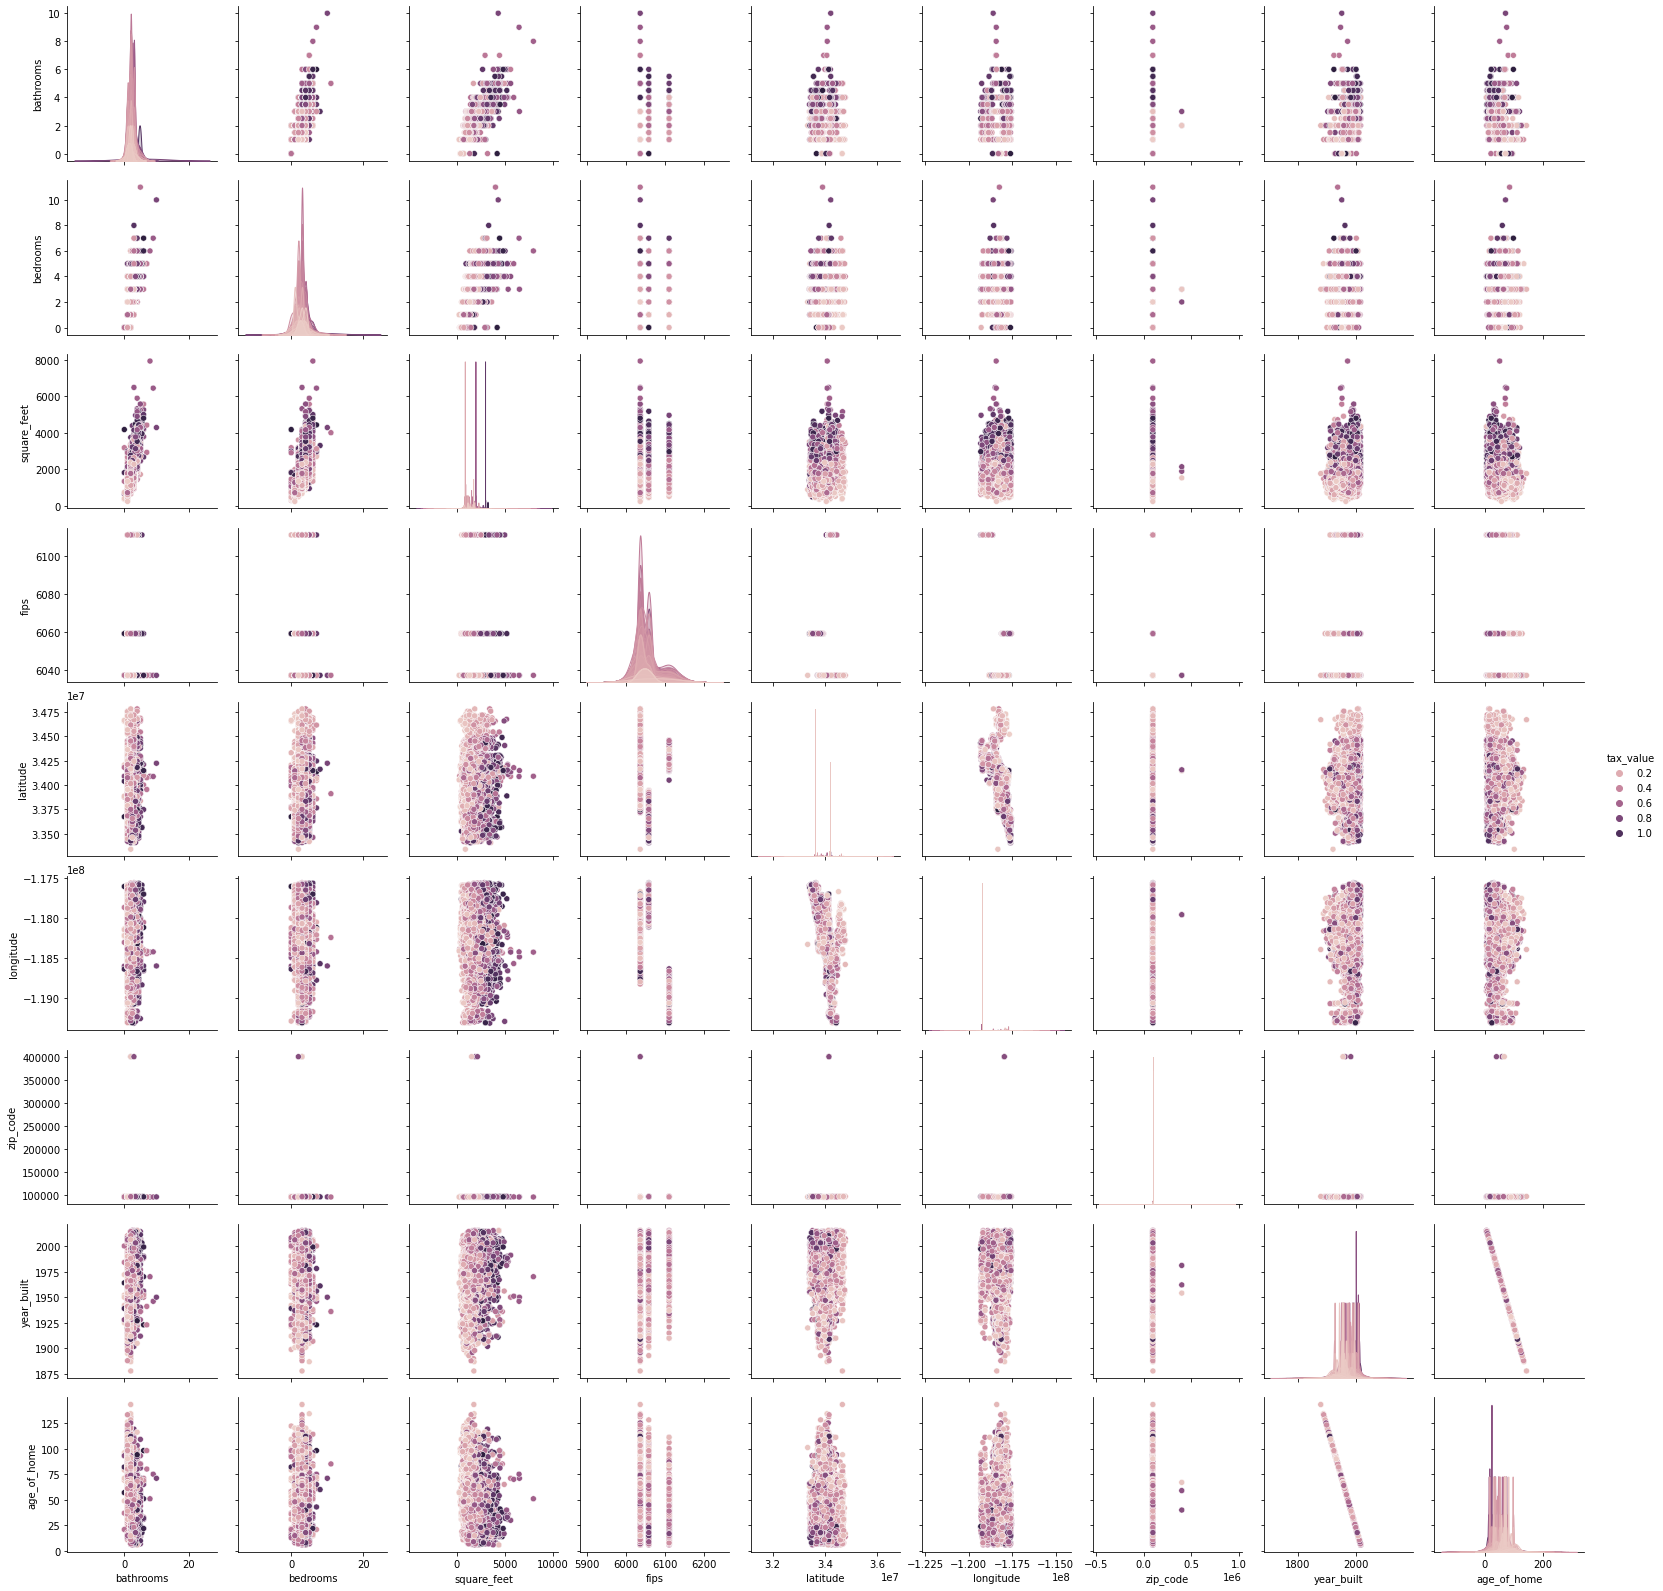

In [15]:
sns.pairplot(data = train, hue='tax_value')

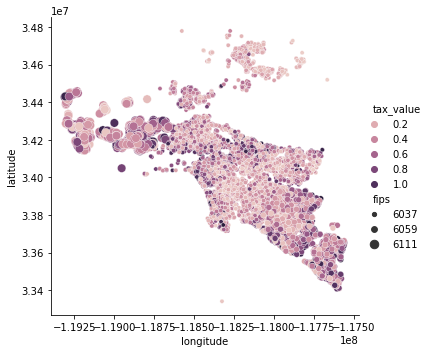

In [14]:
sns.relplot(data=train, y='latitude', x='longitude',size='fips', hue='tax_value',)

In [16]:
#fips 6111 = ventura co. 
#            coastal zips [93041, 93033, 93043, 93035, 93036, 93042 ]
#     6059 = Orange co.
#            coastal zips = [90740, 90743, 90742, 92649, 92648, 92646, 92663, 92662, 
#                            92625, 92657, 92651, 92629, 92624, 92672
#     6037 = Madera co.
#          


<AxesSubplot:xlabel='square_feet', ylabel='latitude'>

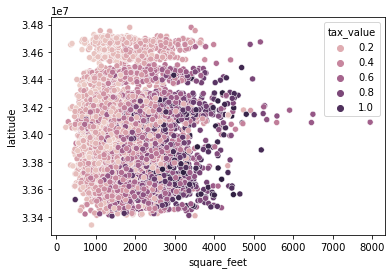

In [23]:
# longitude and latitude to square_feet, target tax_value
sns.scatterplot(data=train, y='latitude',x= 'square_feet', hue='tax_value')

higher tax_value density towards south

<Figure size 1008x720 with 0 Axes>

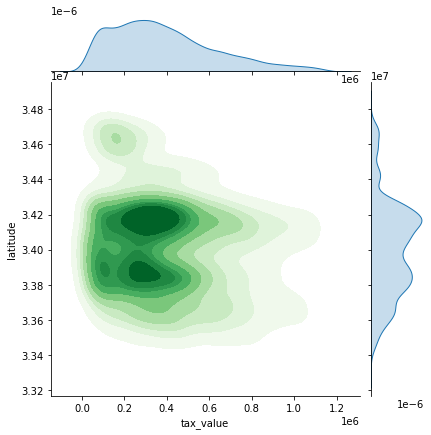

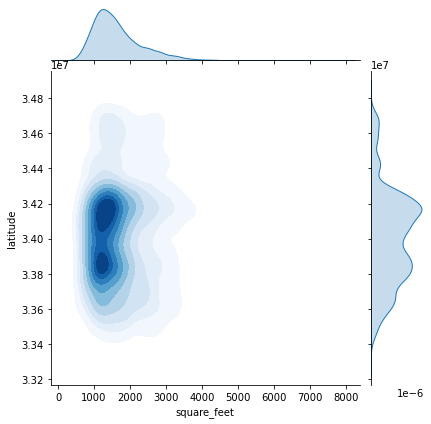

In [58]:
plt.figure(figsize=(14,10))


sns.jointplot(data = train, 
              x = 'tax_value', 
              y = 'latitude', 
              kind = 'kde', 
              cmap = 'Greens',
              fill = True)

plt.show()

sns.jointplot(data = train, 
              x = 'square_feet', 
              y = 'latitude', 
              kind = 'kde', 
              cmap = 'Blues',
              fill = True)

plt.show()

<Figure size 720x576 with 0 Axes>

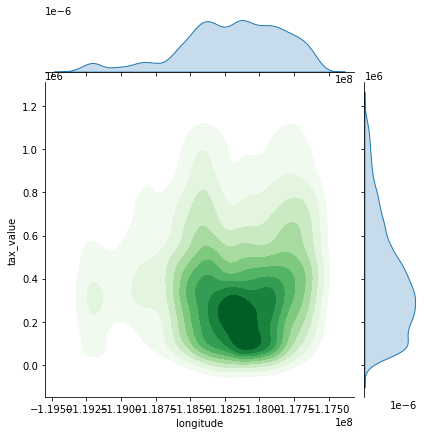

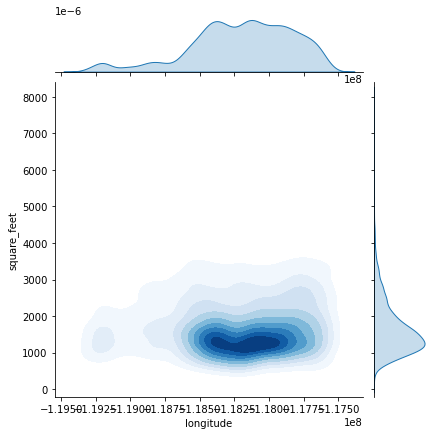

In [59]:
plt.figure(figsize=(10,8))


sns.jointplot(data = train, 
              x = 'longitude', 
              y = 'tax_value', 
              kind = 'kde', 
              cmap = 'Greens',
              fill = True)

plt.show()

sns.jointplot(data = train, 
              x = 'longitude', 
              y = 'square_feet', 
              kind = 'kde', 
              cmap = 'Blues',
              fill = True)

plt.show()

perhaps higher tax_value to the east?

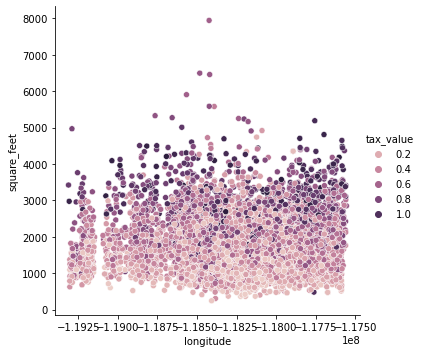

In [33]:
sns.relplot(data=train, x='longitude',y='square_feet', hue='tax_value')